# Retail Sentiment Analysis - Part 1: Data Exploration

**Project**: Analyzing customer reviews to extract business insights

**Notebook Purpose**: Load and explore the dataset to understand its structure and quality

**Author**: Aranya Bhattacharyya

**Date**: January 2026

## 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

**TODO**: Update the file path to match your downloaded dataset

In [4]:
# Load data
# UPDATE THIS PATH to match your dataset location
data_path = ('C:/Users/arany/Desktop/Projects/Amazon Product Reviews/Reviews.csv')

# Try loading with different encodings if you get errors
try:
    df = pd.read_csv(data_path)
except UnicodeDecodeError:
    df = pd.read_csv(data_path, encoding='latin-1')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 568454 rows, 10 columns


## 3. Initial Data Exploration

In [5]:
# First few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelati..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got thi...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very qu...


In [6]:
# Column names and types
print("Column Information:")
df.info()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
# Basic statistics
print("Numerical Column Statistics:")
df.describe()

Numerical Column Statistics:


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
# Check column names
print("All columns in dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

All columns in dataset:
1. Id
2. ProductId
3. UserId
4. ProfileName
5. HelpfulnessNumerator
6. HelpfulnessDenominator
7. Score
8. Time
9. Summary
10. Text


## 4. Identify Key Columns

**TODO**: Update these variable names to match YOUR dataset's column names

In [9]:
# IMPORTANT: Update these to match your dataset's actual column names
# Common variations:
# - Review text: 'review', 'text', 'review_text', 'reviewText', 'Review Text'
# - Rating: 'rating', 'stars', 'overall', 'Rating'

# UPDATE THESE:
review_column = 'Text'  # Column containing review text
rating_column = 'Score'        # Column containing ratings (1-5)

# Verify these columns exist
if review_column in df.columns:
    print(f"✓ Found review column: '{review_column}'")
else:
    print(f"✗ Column '{review_column}' not found. Check column names above.")

if rating_column in df.columns:
    print(f"✓ Found rating column: '{rating_column}'")
else:
    print(f"✗ Column '{rating_column}' not found. Check column names above.")

✓ Found review column: 'Text'
✓ Found rating column: 'Score'


## 5. Data Quality Check

In [10]:
# Check for missing values
print("Missing Values per Column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

Missing Values per Column:
             Missing Count  Percentage
Summary                 27    0.004750
ProfileName             26    0.004574


In [11]:
# Check for duplicate reviews
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if review_column in df.columns:
    duplicate_reviews = df[review_column].duplicated().sum()
    print(f"Number of duplicate review texts: {duplicate_reviews}")

Number of duplicate rows: 0
Number of duplicate review texts: 174875


## 6. Explore Review Text

In [12]:
# Sample reviews
if review_column in df.columns:
    print("Sample of 5 random reviews:\n")
    for i, review in enumerate(df[review_column].dropna().sample(5), 1):
        print(f"{i}. {review[:200]}...")  # First 200 characters
        print()

Sample of 5 random reviews:

1. I really love this tea. Its great without anything added and tastes great with a little lemon or lemon juice!...

2. This was really good popcorn, it was just like at the movies.I will buy it again and again..it has just enough butter and salt.. I will have some tonight.....

3. This chocolate is nothing short of amazing.  We've used them for everything from cooking to hot chocolate.  However, if you're just buying them to savor, then savor you will!  Probably one of the best...

4. Just recieved my k cups and thrilled with the assortmet.  i got mostly two of some flavors, and three of one kind, But extremely happy with what I got!  i definately will be ordering again and again! ...

5. This is my favorite of all the mocha cafe's. It is rich, smooth and has an incredible taste. Believe me, I have tried them all and I always come back to this one. So, if you like mocha and have not tr...



In [13]:
# Review length statistics
if review_column in df.columns:
    df['review_length'] = df[review_column].fillna('').str.len()
    df['review_word_count'] = df[review_column].fillna('').str.split().str.len()
    
    print("Review Length Statistics:")
    print(f"Average characters: {df['review_length'].mean():.0f}")
    print(f"Average words: {df['review_word_count'].mean():.0f}")
    print(f"Shortest review: {df['review_length'].min()} characters")
    print(f"Longest review: {df['review_length'].max()} characters")

Review Length Statistics:
Average characters: 436
Average words: 80
Shortest review: 12 characters
Longest review: 21409 characters


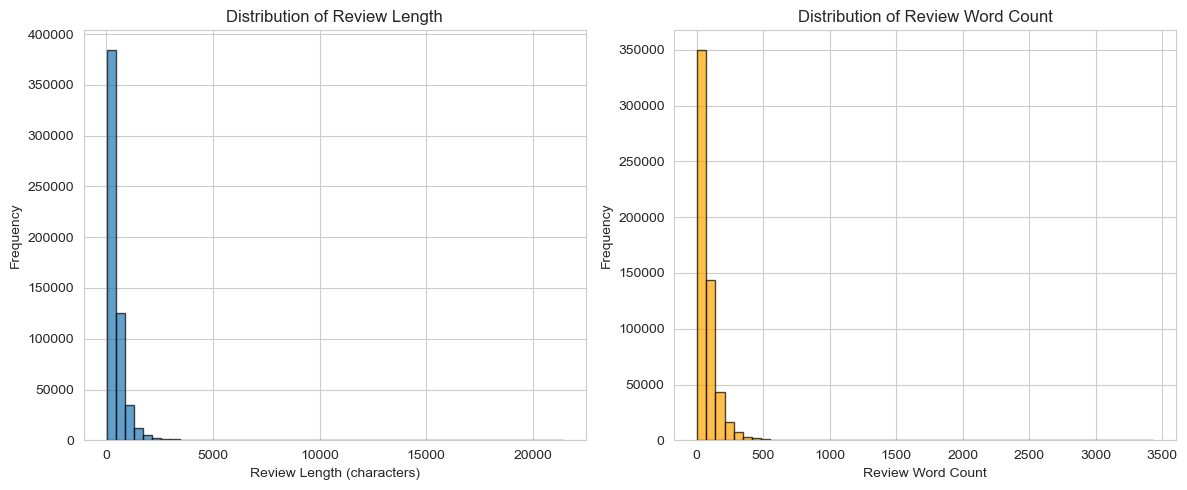

In [14]:
# Visualize review length distribution
if 'review_length' in df.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df['review_length'], bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Review Length (characters)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Review Length')
    
    plt.subplot(1, 2, 2)
    plt.hist(df['review_word_count'], bins=50, edgecolor='black', alpha=0.7, color='orange')
    plt.xlabel('Review Word Count')
    plt.ylabel('Frequency')
    plt.title('Distribution of Review Word Count')
    
    plt.tight_layout()
    plt.show()

## 7. Explore Ratings

In [15]:
# Rating distribution
if rating_column in df.columns:
    print("Rating Distribution:")
    rating_counts = df[rating_column].value_counts().sort_index()
    print(rating_counts)
    print()
    print(f"Average rating: {df[rating_column].mean():.2f}")
    print(f"Median rating: {df[rating_column].median():.1f}")

Rating Distribution:
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

Average rating: 4.18
Median rating: 5.0


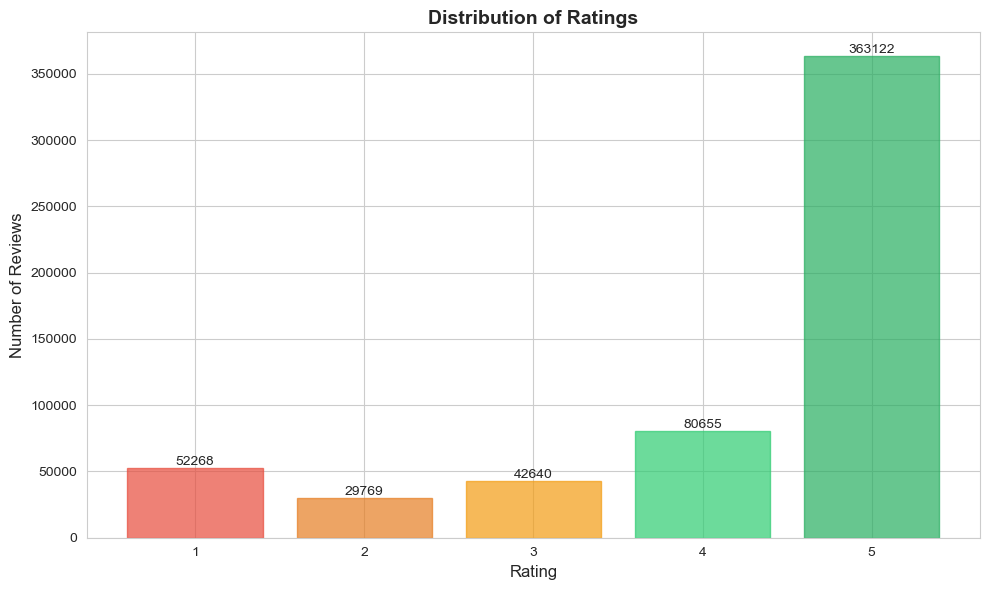

In [16]:
# Visualize rating distribution
if rating_column in df.columns:
    plt.figure(figsize=(10, 6))
    
    rating_counts = df[rating_column].value_counts().sort_index()
    bars = plt.bar(rating_counts.index, rating_counts.values, edgecolor='black', alpha=0.7)
    
    # Color bars
    colors = ['#e74c3c', '#e67e22', '#f39c12', '#2ecc71', '#27ae60']
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
    plt.xticks(rating_counts.index)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

## 8. Key Insights from Exploration

**TODO**: After running all cells, document your findings here

### Findings:

1. **Dataset Size**: 568454 rows, 10 columns
2. **Missing Data**: 27
3. **Review Characteristics**: 436
4. **Rating Distribution**: It is not balanced as it is more positively skewed. 
5. **Data Quality Issues**: No Problems to address

### Next Steps:

1. Clean missing values in review text
2. Remove duplicates if necessary
3. Preprocess text (remove special characters, lowercase, etc.)
4. Run sentiment analysis
5. Compare sentiment with actual ratings

## 9. Save Exploration Summary

In [17]:
# Create summary report
summary = {
    'total_reviews': len(df),
    'columns': list(df.columns),
    'missing_values': df.isnull().sum().to_dict(),
    'duplicates': df.duplicated().sum(),
}

if rating_column in df.columns:
    summary['rating_distribution'] = df[rating_column].value_counts().to_dict()
    summary['average_rating'] = df[rating_column].mean()

if 'review_length' in df.columns:
    summary['avg_review_length'] = df['review_length'].mean()
    summary['avg_word_count'] = df['review_word_count'].mean()

print("Exploration complete!")
print("\nSummary saved. Ready for preprocessing in next notebook.")

Exploration complete!

Summary saved. Ready for preprocessing in next notebook.
